<>:12: SyntaxWarning: invalid escape sequence '\K'
<>:12: SyntaxWarning: invalid escape sequence '\K'
C:\Users\MSI Katana\AppData\Local\Temp\ipykernel_21264\1121446249.py:12: SyntaxWarning: invalid escape sequence '\K'
  data = pd.read_csv('D:\Kampus\Sem 5\DM\diabetes.csv')


Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Statistik deskriptif:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469 

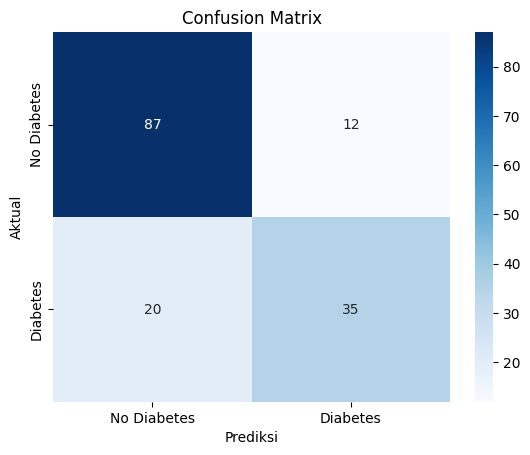

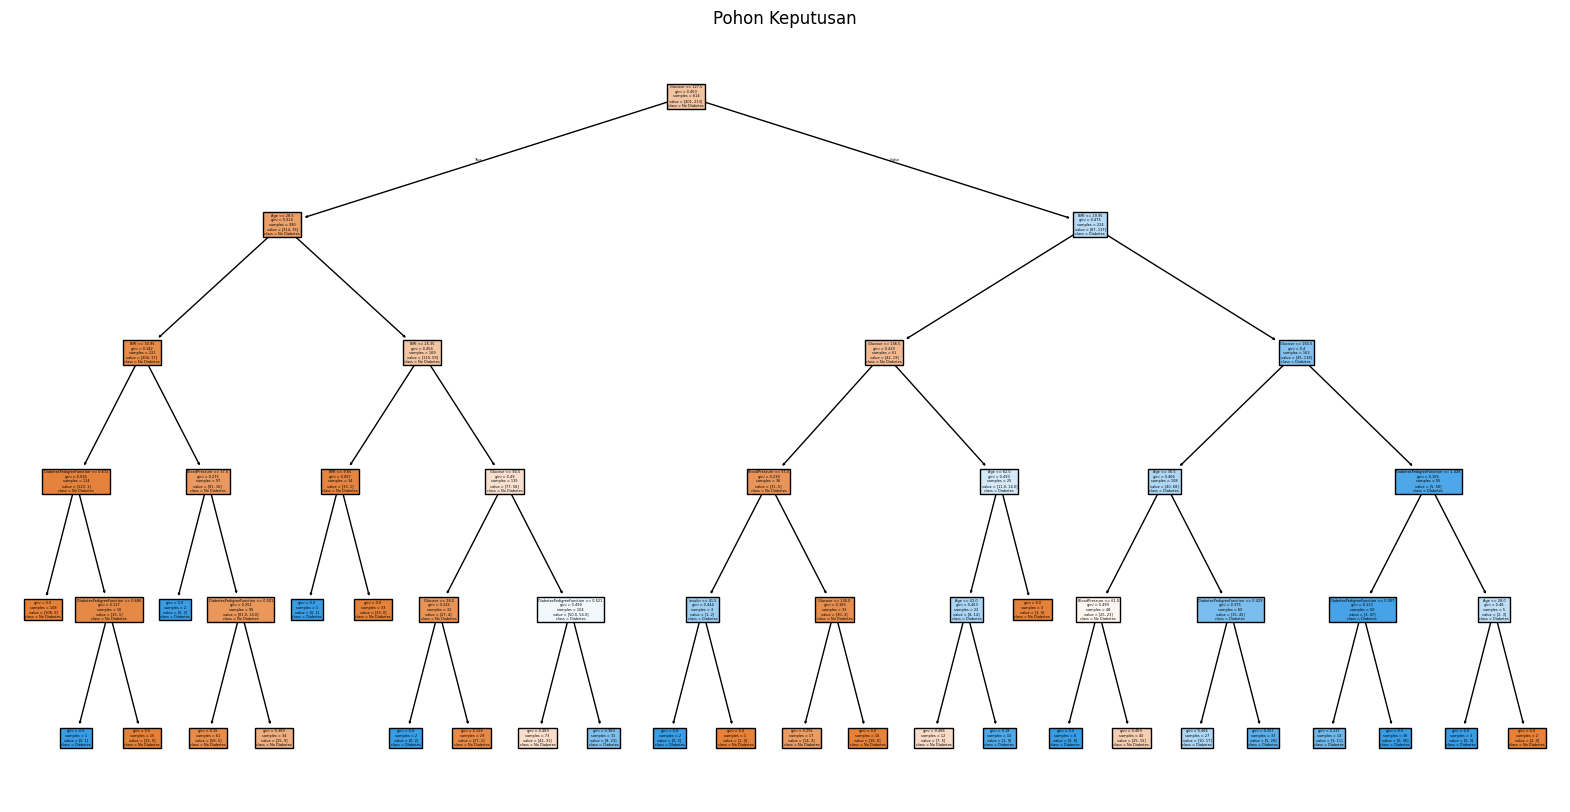

In [1]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Membaca Dataset
# Ganti 'pima_diabetes.csv' dengan nama file Anda
data = pd.read_csv('D:\Kampus\Sem 5\DM\diabetes.csv')

# Menampilkan informasi awal dataset
print("Info dataset:")
print(data.info())
print("\nStatistik deskriptif:")
print(data.describe())

# 2. Preprocessing Data
# Cek nilai kosong
print("\nNilai kosong dalam dataset:")
print(data.isnull().sum())

# Pisahkan fitur (X) dan target (y)
# Asumsikan kolom terakhir adalah 'Outcome' (0 = Tidak Diabetes, 1 = Diabetes)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Membuat Model Decision Tree
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# 4. Evaluasi Model
# Prediksi data uji
y_pred = dt_model.predict(X_test)

# Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAkurasi Model: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

# 5. Visualisasi Pohon Keputusan
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.title('Pohon Keputusan')
plt.show()
